<a href="https://colab.research.google.com/github/Honaht01/PDA_sol/blob/main/%D0%A1%D0%B0%D0%BC%D0%BE%D1%81%D1%82%D0%BE%D1%8F%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Выполнил: Григорьев П.К.**

Задание:

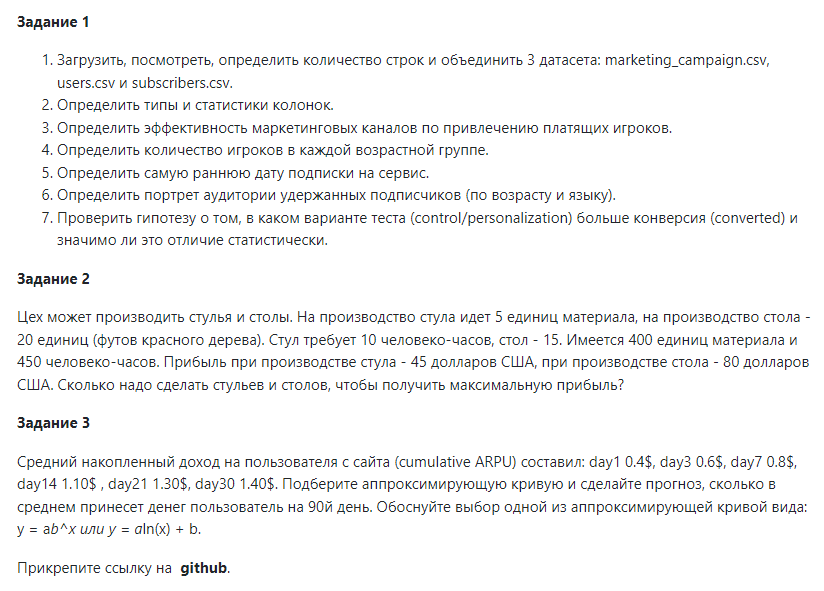

In [ ]:
import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install pulp
import pulp as pu

**Задание 1**

1 + 2

In [ ]:
from google.colab import files
files.upload()

In [ ]:
dfmar = pd.read_csv("marketing_campaign.csv")
dfsub = pd.read_csv("subscribers.csv")
dfu=pd.read_csv("users.csv")

Marketing_campaign

In [ ]:
dfmar.head()

,user_id,date_served,marketing_channel,variant,language_displayed,converted
0,a1000,1/1/18,House Ads,personalization,English,True
1,a1001,1/1/18,House Ads,personalization,English,True
2,a1002,1/1/18,House Ads,personalization,English,True
3,a1003,1/1/18,House Ads,personalization,English,True
4,a1004,1/1/18,House Ads,personalization,English,True


In [ ]:
dfmar.shape

(10037, 6)

Subscribers

In [ ]:
dfsub.head()

,user_id,subscribing_channel,date_subscribed,date_canceled,is_retained
0,a1000,House Ads,1/1/18,NaN,True
1,a1001,House Ads,1/1/18,NaN,True
2,a1002,House Ads,1/1/18,NaN,True
3,a1003,House Ads,1/1/18,NaN,True
4,a1004,House Ads,1/1/18,NaN,True


In [ ]:
dfsub.shape

(10037, 5)

Users

In [ ]:
dfu.head()

,user_id,age_group,language_preferred
0,a1000,0-18 years,English
1,a1001,19-24 years,English
2,a1002,24-30 years,English
3,a1003,30-36 years,English
4,a1004,36-45 years,English


In [ ]:
dfu.shape

(10037, 3)

В датасете Subscribers видны пропуски, проверим их количество во всех датасетах:

In [ ]:
dfmar.isna().sum()

user_id                0
date_served           16
marketing_channel     15
variant                0
language_displayed     0
converted             15
dtype: int64

In [ ]:
dfsub.isna().sum()

user_id                   0
subscribing_channel    8181
date_subscribed        8181
date_canceled          9460
is_retained            8181
dtype: int64

In [ ]:
dfu.isna().sum()

user_id               0
age_group             0
language_preferred    0
dtype: int64

Во всех датасетах есть поле 'user_id', объединить можно по нему.

In [ ]:
dfcom = dfu.merge(dfsub, on="user_id", how="left")
dfcom = dfcom.merge(dfmar, on="user_id", how="left")
dfcom.head()

,user_id,age_group,language_preferred,subscribing_channel,date_subscribed,date_canceled,is_retained,date_served,marketing_channel,variant,language_displayed,converted
0,a1000,0-18 years,English,House Ads,1/1/18,NaN,True,1/1/18,House Ads,personalization,English,True
1,a1001,19-24 years,English,House Ads,1/1/18,NaN,True,1/1/18,House Ads,personalization,English,True
2,a1002,24-30 years,English,House Ads,1/1/18,NaN,True,1/1/18,House Ads,personalization,English,True
3,a1003,30-36 years,English,House Ads,1/1/18,NaN,True,1/1/18,House Ads,personalization,English,True
4,a1004,36-45 years,English,House Ads,1/1/18,NaN,True,1/1/18,House Ads,personalization,English,True


In [ ]:
dfcom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   age_group            10037 non-null  object
 2   language_preferred   10037 non-null  object
 3   subscribing_channel  1856 non-null   object
 4   date_subscribed      1856 non-null   object
 5   date_canceled        577 non-null    object
 6   is_retained          1856 non-null   object
 7   date_served          10021 non-null  object
 8   marketing_channel    10022 non-null  object
 9   variant              10037 non-null  object
 10  language_displayed   10037 non-null  object
 11  converted            10022 non-null  object
dtypes: object(12)
memory usage: 1019.4+ KB


In [ ]:
dfcom.isna().sum()

user_id                   0
age_group                 0
language_preferred        0
subscribing_channel    8181
date_subscribed        8181
date_canceled          9460
is_retained            8181
date_served              16
marketing_channel        15
variant                   0
language_displayed        0
converted                15
dtype: int64

In [ ]:
dfcom.describe()

,user_id,age_group,language_preferred,subscribing_channel,date_subscribed,date_canceled,is_retained,date_served,marketing_channel,variant,language_displayed,converted
count,10037,10037,10037,1856,1856,577,1856,10021,10022,10037,10037,10022
unique,10037,7,4,5,31,115,2,31,5,2,4,2
top,a1000,19-24 years,English,Instagram,1/16/18,4/2/18,True,1/15/18,House Ads,control,English,False
freq,1,1682,9275,600,163,15,1279,789,4733,5091,9793,8946


3. Определить эффективность маркетинговых каналов по привлечению платящих игроков.

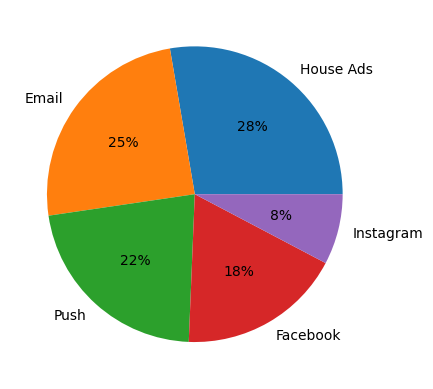

In [ ]:
dfpay= dfcom[dfcom['converted'] == True]
data = dfpay['marketing_channel'].value_counts()
labels = dfpay['marketing_channel'].unique()
fig, ax = plt.subplots()
plt.pie(data, labels = labels, autopct='%.0f%%')
plt.show()

Самый эффективный канал - house ads.

4. Определить количество игроков в каждой возрастной группе.

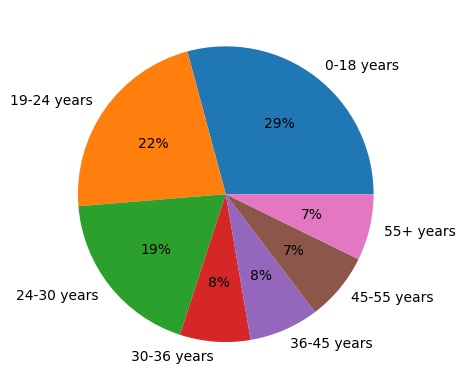

In [50]:
data = dfpay['age_group'].value_counts()
labels = dfpay['age_group'].unique()
fig, ax = plt.subplots()
plt.pie(data, labels = labels, autopct='%.0f%%')
plt.show()

Больше всего игроков в возрасте до 18 лет

5. Определить самую раннюю дату подписки на сервис.

In [ ]:
dfcom['date_subscribed'] = pd.to_datetime(dfcom['date_subscribed'])
print("Саммая ранняя дата подписки на сервис:", dfcom['date_subscribed'].min())

Саммая ранняя дата подписки на сервис: 2018-01-01 00:00:00


6. Определить портрет аудитории удержанных подписчиков (по возрасту и языку).

In [61]:
dfret= dfcom[dfcom['is_retained'] == True]
dfaud = dfret.groupby(['age_group', 'language_preferred']).size().reset_index(name='cnt')
pivot = dfaud.pivot("age_group", "language_preferred", "cnt")
pivot

<ipython-input-61-7b3353c45d89>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot = dfaud.pivot("age_group", "language_preferred", "cnt")


language_preferred,Arabic,English,German,Spanish
age_group,,,,
0-18 years,3.0,210.0,10.0,6.0
19-24 years,1.0,304.0,11.0,10.0
24-30 years,3.0,250.0,15.0,5.0
30-36 years,NaN,114.0,1.0,7.0
36-45 years,1.0,107.0,2.0,5.0
45-55 years,2.0,108.0,3.0,6.0
55+ years,2.0,86.0,2.0,5.0


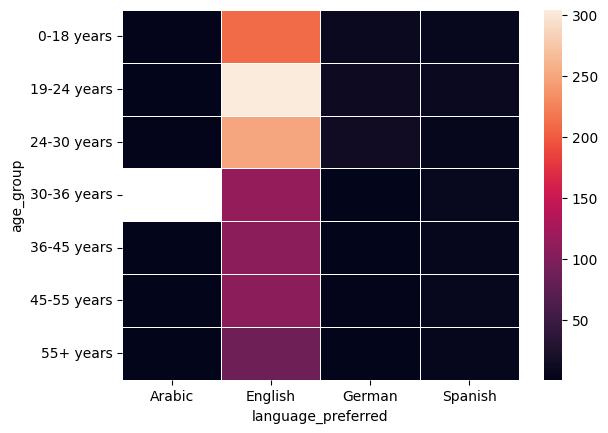

In [64]:
sns.heatmap(pivot, linewidth=0.5)
plt.show()

Больше всего англоговорящих пользователей, особенно в возрасте до 30 лет.

7. Проверить гипотезу о том, в каком варианте теста (control/personalization) больше конверсия (converted) и значимо ли это отличие статистически.

Ранее нами был сформирован датафрейм, включающий конвертированных пользователей. Посмотрим, сколько их.

In [67]:
dfpay.shape

(1076, 12)

In [68]:
condf = dfcom[dfcom['variant'] == 'control']
persdf = dfcom[dfcom['variant'] == 'personalization']
con_conv = condf['converted'].sum()
pers_conv = persdf['converted'].sum()
print('Количество конвертированных пользователей при варианте control: ', con_conv, '\nКоличество конвертированных пользователей при варианте personalisation: ', pers_conv)

Количество конвертированных пользователей при варианте control:  371 
Количество конвертированных пользователей при варианте personalisation:  705


Также посмотрим размеры датафреймов, чтобы понять, схожи ли они.

In [70]:
condf.shape

(5091, 12)

In [71]:
persdf.shape

(4946, 12)

По размеру датафреймы примерно схожи. Проверим статистическую значимость методом χ2

In [72]:
from scipy.stats import chi2_contingency

check = pd.crosstab(dfcom['variant'], dfcom['converted'])
chi2, p, _, _ = chi2_contingency(check)
print(p)

4.2578225900198324e-29


Необходимо определить уровень значимости.

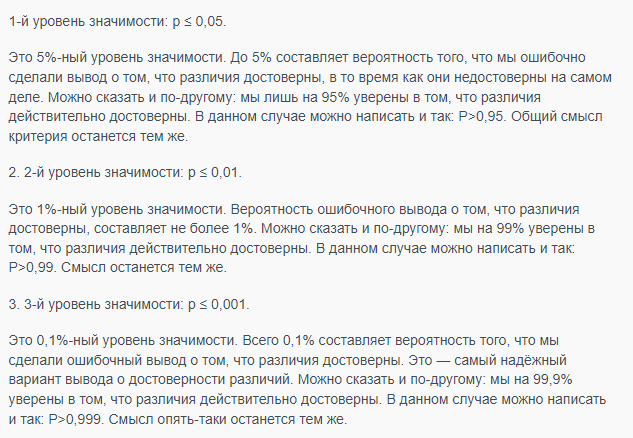

In [77]:
4.2578225900198324e-29 <= 0.001

True

**Вывод: отличие значимо статистически.**

**Задание 2.**

Пусть х - количество стульев, у - количество столов.

Необходимо максимизировать функцию f=45x+80y при заданных условиях задачи.

In [86]:
task = pu.LpProblem("Maximize_Profit", pu.LpMaximize)
x = pu.LpVariable("x", lowBound=0, cat="Integer")
y = pu.LpVariable("y", lowBound=0, cat="Integer")

task += 45*x + 80*y
task += 5*x + 20*y <= 400
task += 10*x + 15*y <= 450
task.solve()

print("Оптимальное количество стульев: ", x.varValue, ", оптимальное количество столов: ", y.varValue, "\nМаксимальная прибыль: ", pulp.value(task.objective))

Оптимальное количество стульев:  24.0 , оптимальное количество столов:  14.0 
Максимальная прибыль:  2200.0


**Задание 3.**

In [89]:
from scipy.optimize import curve_fit

day = [1, 3, 7, 14, 21, 30]
income = [0.40, 0.60, 0.80, 1.10, 1.30, 1.40]

def expon(x, a, b):
    return a * (b ** x)

params, covariance = curve_fit(expon, day, income, p0=[0.4, 1])
a, b = params

predict = expon(90, a, b)
print("Прогнозируемый средний накопленный доход на пользователя на 90-ый день:", predict, "$")

Прогнозируемый средний накопленный доход на пользователя на 90-ый день: 9.872828439480912 $
